In [22]:
!jt -t chesterish

In [17]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [23]:
! jt -r


Reset css and font defaults in:
C:\Users\teodo\.jupyter\custom &
C:\Users\teodo\AppData\Roaming\jupyter\nbextensions


In [1]:
import seaborn as sns

In [2]:
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
df = pd.read_csv("data_SVM.csv", header=None)
df.head()

,0,1,2
0,0.24539,0.81725,0
1,0.21774,0.76462,0
2,0.20161,0.69737,0
3,0.20161,0.58041,0
4,0.24770,0.49561,0


In [4]:
df.shape

(96, 3)

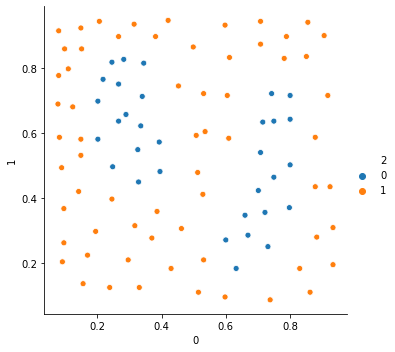

In [5]:
sns.relplot(x=0, y=1,hue=2, data=df);

In [6]:
X = df[[0,1]]
y = df[2]

In [7]:
model = SVC()
model.fit(X,y)

SVC()

In [8]:
df[2].value_counts(normalize=True)

1    0.666667
0    0.333333
Name: 2, dtype: float64

In [9]:
y_pred = model.predict(X)

In [10]:
acc = accuracy_score(y, y_pred)
acc

0.8541666666666666

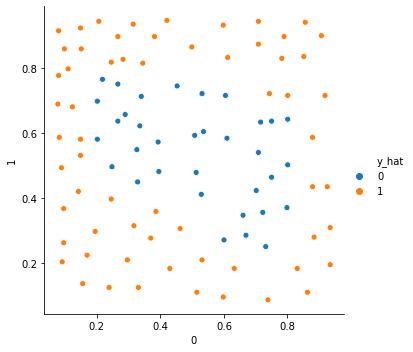

In [12]:
df['y_hat'] = y_pred
sns.relplot(x=0, y=1,hue="y_hat", data=df);

In [13]:
from sklearn.model_selection import GridSearchCV

In [55]:
tuned_parameters = {'kernel': ['poly'], "degree":[1,2,3], 'C': [0.01,0.05]}
tuned_parameters

{'kernel': ['poly'], 'degree': [1, 2, 3], 'C': [0.01, 0.05]}

In [56]:
grid = GridSearchCV(SVC(), param_grid=tuned_parameters)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'degree': [1, 2, 3],
                         'kernel': ['poly']})

In [57]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 0.01, 'degree': 1, 'kernel': 'poly'}
SVC(C=0.01, degree=1, kernel='poly')


In [53]:
model = SVC(kernel='poly', degree=2, C=0.1)
model.fit(X,y)
y_pred = model.predict(X)
print(classification_report(y_pred, y)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80        96

    accuracy                           0.67        96
   macro avg       0.50      0.33      0.40        96
weighted avg       1.00      0.67      0.80        96



C:\Users\teodo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
acc = accuracy_score(y, y_pred)
acc

0.6666666666666666

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 2, 6)
kernel_list=['rbf']
param_grid = dict(kernel=kernel_list,gamma=gamma_range, C=C_range)
param_grid

{'kernel': ['rbf'],
 'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [77]:

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf']})

In [78]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'} with a score of 0.89


In [79]:
grid.best_params_

{'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'}

In [83]:
model = SVC(**{'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'})
model.fit(X,y)
y_pred = model.predict(X)
print(classification_report(y_pred, y)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        64

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



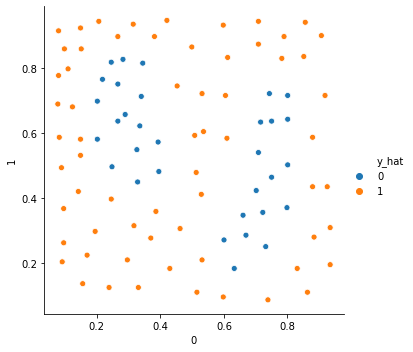

In [84]:
df['y_hat'] = y_pred
sns.relplot(x=0, y=1,hue="y_hat", data=df)

In [85]:
acc = accuracy_score(y, y_pred)
acc

1.0